In [1]:
import pandas as pd
import numpy as np
import time
from datetime import date
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import seaborn as sns

In [ ]:
df2 = pd.read_csv('Tweet.csv')
df3 = pd.read_csv('Company_Tweet.csv')
result = pd.read_csv('result.csv')

In [4]:
stock = pd.read_csv('/Users/karlgilmartin/Documents/Data Analytics/Twitter /CompanyValues.csv')

In [5]:
companies = result['ticker_symbol'].unique()
print(companies)
company_df = pd.DataFrame({'company': companies})

['AAPL' 'AMZN' 'TSLA' 'MSFT' 'GOOG' 'GOOGL']


In [6]:
company_df.head()

,company
0,AAPL
1,AMZN
2,TSLA
3,MSFT
4,GOOG


<AxesSubplot: >

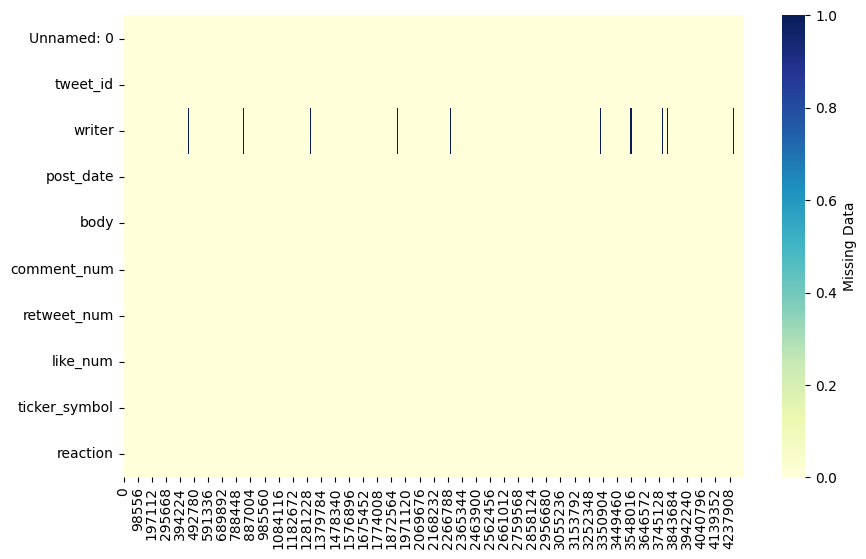

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(result.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

In [8]:
result.min()

/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_32954/2700323295.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  result.min()


Unnamed: 0                                                       0
tweet_id                                        550441509175443456
post_date                                               1420070457
body                                                     $tsla ...
comment_num                                                      0
retweet_num                                                      0
like_num                                                         0
ticker_symbol                                                 AAPL
reaction                                                  Negative
dtype: object

In [9]:
df2.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1


In [10]:
df3.head()

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL


In [11]:
print(df2.shape)
print(df3.shape)

(3717964, 7)
(4336445, 2)


result = pd.merge(df2, df3[['ticker_symbol','tweet_id']], on= 'tweet_id')
result.head()

In [11]:
meaning = []
def sentiment_scores(sentence, sid_obj):
 
    # Create a SentimentIntensityAnalyzer object.
    # sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
     
     
    #print("Sentence Overall Rated As", end = " ")
 
    # decide sentiment as positive, negative and neutral
    if sentiment_dict['compound'] >= 0.05 :
        x = "Positive"
 
    elif sentiment_dict['compound'] <= - 0.05 :
        x = "Negative"
 
    else :
        x = "Neutral"
    meaning.append(x)
    #print(meaning)


sid_obj = SentimentIntensityAnalyzer()

for item in result['body']:
    sentiment_scores(item, sid_obj)

result['reaction'] = meaning


In [12]:
result.tail()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction
4336440,4336440,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,Negative
4336441,4336441,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,Negative
4336442,4336442,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,Neutral
4336443,4336443,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,Neutral
4336444,4336444,1212160477159206912,treabase,1577836553,"$AAPL #patent 10,522,475 Vertical interconnect...",0,0,0,AAPL,Neutral


result.to_csv('result.csv')

In [13]:
result = result.replace('Negative', -1)
result = result.replace('Neutral', 0)
result = result.replace('Positive', 1)

In [12]:
result.head()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction
0,0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,Neutral
1,1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,Negative
2,2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,Negative
3,3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,Neutral
4,4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,Neutral


In [15]:
nums = []
def toDate(num):
    temp = datetime.fromtimestamp(int(num))
    nums.append(temp)

    

In [16]:
for date in result['post_date']:
    toDate(date)

In [17]:
result['date'] = nums

In [19]:
result.tail()

,Unnamed: 0,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
4336440,4336440,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,Negative,2019-12-31 23:53:21
4336441,4336441,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,Negative,2019-12-31 23:54:03
4336442,4336442,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,Neutral,2019-12-31 23:55:37
4336443,4336443,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,Neutral,2019-12-31 23:55:37
4336444,4336444,1212160477159206912,treabase,1577836553,"$AAPL #patent 10,522,475 Vertical interconnect...",0,0,0,AAPL,Neutral,2019-12-31 23:55:53


In [19]:
result.drop(['post_date'], axis=1)

,Unnamed: 0,tweet_id,writer,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,0,550441509175443456,VisualStockRSRC,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01 00:00:57
1,1,550441672312512512,KeralaGuy77,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01 00:01:36
2,2,550441732014223360,DozenStocks,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01 00:01:50
3,3,550442977802207232,ShowDreamCar,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01 00:06:47
4,4,550443807834402816,i_Know_First,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01 00:10:05
...,...,...,...,...,...,...,...,...,...,...
4336440,4336440,1212159838882533376,ShortingIsFun,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,-1,2019-12-31 23:53:21
4336441,4336441,1212160015332728833,Commuternyc,Patiently Waiting for the no twitter sitter tw...,0,0,5,TSLA,-1,2019-12-31 23:54:03
4336442,4336442,1212160410692046849,MoriaCrypto,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,0,2019-12-31 23:55:37
4336443,4336443,1212160410692046849,MoriaCrypto,I don't discriminate. I own both $aapl and $ms...,1,0,1,MSFT,0,2019-12-31 23:55:37


In [1]:
result.tail()

NameError: name 'result' is not defined

In [22]:
result.columns

Index(['Unnamed: 0', 'tweet_id', 'writer', 'post_date', 'body', 'comment_num',
       'retweet_num', 'like_num', 'ticker_symbol', 'reaction', 'date'],
      dtype='object')

In [23]:
result = result.drop(['Unnamed: 0'], axis=1)

In [24]:
result.isnull().values.any()

True

In [271]:
result.isnull().sum().sum()

0

In [26]:
result['tweet_id'].isnull().values.any()

False

In [27]:

for (columnName, columnData) in result.iteritems():
    count_nan = result[columnName].isnull().sum()
    print('Column Name is :', columnName) 
    print('The type of data in colmun', columnName,  'is: ', result[columnName].dtypes )
    print('Number of Nan values present in column', columnName, 'is', count_nan)
    print('\n')

/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/1322070420.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in result.iteritems():


Column Name is : tweet_id
The type of data in colmun tweet_id is:  int64
Number of Nan values present in column tweet_id is 0


Column Name is : writer
The type of data in colmun writer is:  object
Number of Nan values present in column writer is 55919


Column Name is : post_date
The type of data in colmun post_date is:  int64
Number of Nan values present in column post_date is 0


Column Name is : body
The type of data in colmun body is:  object
Number of Nan values present in column body is 0


Column Name is : comment_num
The type of data in colmun comment_num is:  int64
Number of Nan values present in column comment_num is 0


Column Name is : retweet_num
The type of data in colmun retweet_num is:  int64
Number of Nan values present in column retweet_num is 0


Column Name is : like_num
The type of data in colmun like_num is:  int64
Number of Nan values present in column like_num is 0


Column Name is : ticker_symbol
The type of data in colmun ticker_symbol is:  object
Number of N

### The only column in the dataframe which has nan values is 'Column Writer'


In [28]:
result['writer'] = result['writer'].fillna("Unknown Author")

In [29]:
result['writer'].isnull().values.any()

False

In [30]:
df_popular = result.groupby(result['ticker_symbol'].tolist(), as_index=False).size()

In [31]:
df_popular

,index,size
0,AAPL,1425013
1,AMZN,718715
2,GOOG,392569
3,GOOGL,327569
4,MSFT,375711
5,TSLA,1096868


Text(0.5, 1.0, 'Number of tweets releated to companies')

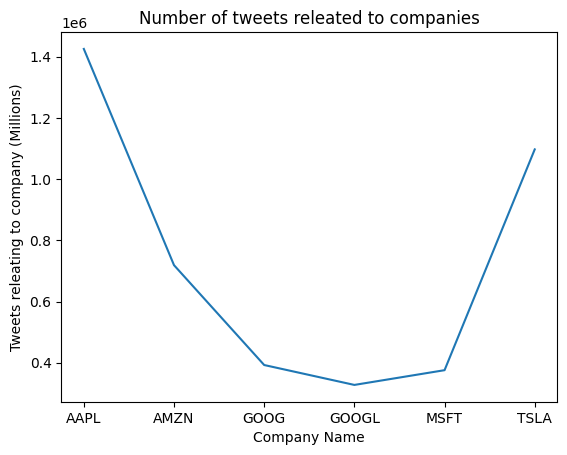

In [32]:
plt.plot( df_popular['index'], df_popular['size'])
plt.ylabel('Tweets releating to company (Millions)')
plt.xlabel('Company Name')
plt.title('Number of tweets releated to companies')

In [33]:
df_popular1 = result.groupby(['ticker_symbol'])['like_num'].transform('sum')

In [34]:
df_popular1.head()

0    1378670
1    1378670
2     984166
3    5769051
4    1378670
Name: like_num, dtype: int64

In [35]:
df4 = result.pivot_table(index = ['ticker_symbol','like_num'], aggfunc='size')

In [36]:
df4.head()

ticker_symbol  like_num
AAPL           0           1047579
               1            213141
               2             65592
               3             30152
               4             16235
dtype: int64

In [37]:
df4.tail()

ticker_symbol  like_num
TSLA           975         1
               986         1
               987         2
               995         1
               999         1
dtype: int64

In [38]:
len(result[(result['ticker_symbol'] == 'AAPL') & (result['like_num'] == 1)])

213141

In [41]:
company_tweet_likes = []
company_tweet_retweet = []
company_name = []
company_name = result['ticker_symbol'].unique()
for name in company_name:
    print(company_tweet_likes)
    company_tweet_likes.append(result.loc[result['ticker_symbol'] == name, 'like_num'].sum())
    company_tweet_retweet.append(result.loc[result['ticker_symbol'] == name, 'retweet_num'].sum())

[]
[1378670]
[1378670, 984166]
[1378670, 984166, 5769051]
[1378670, 984166, 5769051, 347520]
[1378670, 984166, 5769051, 347520, 235928]


In [42]:
print(company_tweet_retweet)

[722396, 419783, 1078386, 193364, 147143, 191550]


In [43]:
print(company_name)

['AAPL' 'AMZN' 'TSLA' 'MSFT' 'GOOG' 'GOOGL']


GOOGL -- Alphabet Inc Class A 


GOOG -- Alphabet Inc Class C

Text(0, 0.5, 'Number of likes (Millions)')

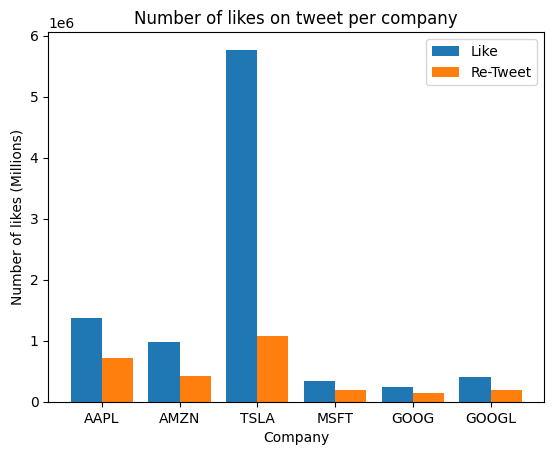

In [44]:
X_axis = np.arange(len(company_name))
plt.bar(X_axis-0.2 ,company_tweet_likes,0.4, label = 'Like')
plt.bar(X_axis+0.2 ,company_tweet_retweet,0.4, label = 'Re-Tweet')

def add_value_label(x_list,y_list):
    for i in range(1, len(x_list)+1):
        plt.text(i,y_list[i-1],y_list[i-1])


plt.xticks(X_axis, company_name)
plt.legend()
plt.title('Number of likes on tweet per company')
plt.xlabel('Company')

plt.ylabel('Number of likes (Millions)')

In [273]:
len(result[(result['ticker_symbol'] == 'AAPL') & (result['reaction'] == 'Neutral')])

639406

In [46]:
result.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01 00:00:57
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01 00:01:36
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01 00:01:50
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01 00:06:47
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01 00:10:05


In [47]:
result = result.drop('writer', axis=1)

In [48]:
result.head()

,tweet_id,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,550441509175443456,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01 00:00:57
1,550441672312512512,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01 00:01:36
2,550441732014223360,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01 00:01:50
3,550442977802207232,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01 00:06:47
4,550443807834402816,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01 00:10:05


In [49]:
day1 = result.query('date >= 20150101 & date <= 20150102')

In [50]:
day1.tail()

,tweet_id,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
683,550803610825928706,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,AAPL,0,2015-01-01 23:59:48
684,550803610825928706,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,GOOGL,0,2015-01-01 23:59:48
685,550803610825928706,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,AMZN,0,2015-01-01 23:59:48
686,550803612197457920,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,AAPL,0,2015-01-01 23:59:49
687,550803612197457920,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,AMZN,0,2015-01-01 23:59:49


In [51]:
day1 = day1.loc[day1['ticker_symbol'] == 'AAPL']

In [274]:
day1.tail()

,tweet_id,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
680,550802855129382912,1420156608,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0,AAPL,1,2015-01-01 23:56:48
681,550802957370159104,1420156633,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4,AAPL,1,2015-01-01 23:57:13
682,550803225113157632,1420156696,Rumor Roundup: What to expect when you're expe...,0,0,0,AAPL,0,2015-01-01 23:58:16
683,550803610825928706,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,AAPL,0,2015-01-01 23:59:48
686,550803612197457920,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,AAPL,0,2015-01-01 23:59:49


In [52]:
day1 = day1.replace('Negative', -1)
day1 = day1.replace('Neutral', 0)
day1 = day1.replace('Positive', 1)


In [53]:
day1.tail()

,tweet_id,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
680,550802855129382912,1420156608,$AAPL - Will $AAPL Give Second entry opportuni...,0,0,0,AAPL,1,2015-01-01 23:56:48
681,550802957370159104,1420156633,"An $AAPL store line in Sapporo Japan for the ""...",2,4,4,AAPL,1,2015-01-01 23:57:13
682,550803225113157632,1420156696,Rumor Roundup: What to expect when you're expe...,0,0,0,AAPL,0,2015-01-01 23:58:16
683,550803610825928706,1420156788,#SENTISHIFTUP $K $FB $GOOGL $GS $GOLD $T $AAPL...,0,0,1,AAPL,0,2015-01-01 23:59:48
686,550803612197457920,1420156789,#TOPTICKERTWEETS $AAPL $IMRS $BABA $EBAY $AMZN...,0,0,1,AAPL,0,2015-01-01 23:59:49


Text(0.5, 1.0, 'Reaction to Apple Tweets')

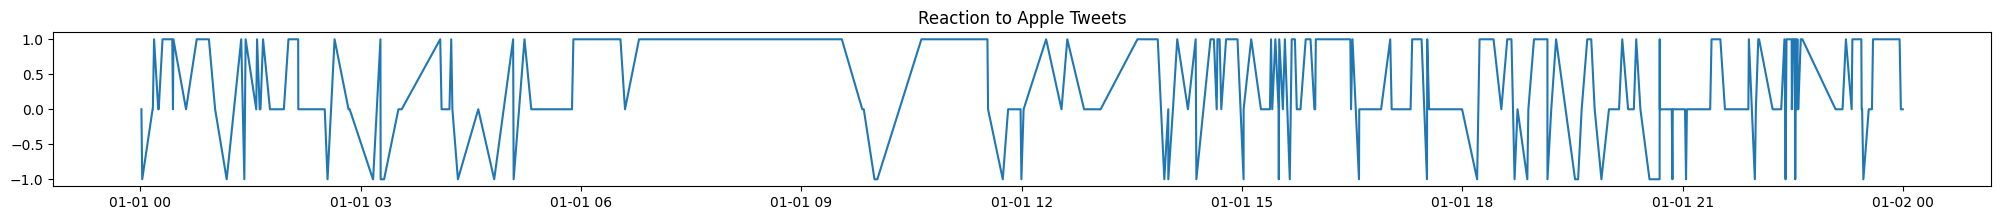

In [54]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(2)
plt.plot(day1['date'], day1['reaction'].sort_index() )

plt.title('Reaction to Apple Tweets')

In [64]:
result['date'] = pd.to_datetime(result['date']).dt.date

In [65]:
result.head()

,tweet_id,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,550441509175443456,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01
1,550441672312512512,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01
2,550441732014223360,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01
3,550442977802207232,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01
4,550443807834402816,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01


In [ ]:
p = result['date'].unique()

In [ ]:
print(len(p)) 


1826


1826 unique dates

In [ ]:
day_ = datetime(2015, 1, 1)
print(day_)
day__ = day_ + relativedelta(days=1)
print(day__) 


2015-01-01 00:00:00
2015-01-02 00:00:00


In [63]:
result.head()

,tweet_id,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,550441509175443456,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01 00:00:57
1,550441672312512512,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01 00:01:36
2,550441732014223360,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01 00:01:50
3,550442977802207232,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01 00:06:47
4,550443807834402816,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01 00:10:05


In [67]:
AAPL_1 = len(result.loc[(result['ticker_symbol'] == 'AAPL' )& (result['date'] == datetime(2015, 1, 1).date())])
print(AAPL_1)

299


In [68]:

print((result.loc[(result['ticker_symbol'] == 'AAPL' )& (result['date'] == datetime(2015, 1, 1).date()), 'reaction'].sum()))
#result.query("ticker_symbol == 'AAPL' and date == datetime(2015, 1, 1).date()", engine='python').head()
print((result.loc[(result['ticker_symbol'] == 'AAPL' )& (result['date'] == datetime(2015, 1, 1).date()), 'reaction'].sum())/ AAPL_1)
#result.query("ticker_symbol == 'AAPL' and date == datetime(2015, 1, 1).date()", engine='python').head()

77
0.25752508361204013


In [72]:
days = result['date'].unique()

In [73]:
print(company_df)

  company
0    AAPL
1    AMZN
2    TSLA
3    MSFT
4    GOOG
5   GOOGL


In [74]:
data = {'date': [0],'AAPL': 0,'AMZN': 0 ,'TSLA': 0,'MSFT': 0,'GOOG': 0,'GOOGL': 0}
df= pd.DataFrame(data)
df.head()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
0,0,0,0,0,0,0,0


In [77]:

date = result.loc[0]['date']
print(date)
for date in days[1000:1826]:
    AAPL = ((result.loc[(result['ticker_symbol'] == 'AAPL' )& (result['date'] == date), 'reaction'].sum())/ (len(result.loc[(result['ticker_symbol'] == 'AAPL' )& (result['date'] == date)])))
    AMZN = ((result.loc[(result['ticker_symbol'] == 'AMZN' )& (result['date'] == date), 'reaction'].sum())/ (len(result.loc[(result['ticker_symbol'] == 'AMZN' )& (result['date'] == date)])))
    TSLA = ((result.loc[(result['ticker_symbol'] == 'TSLA' )& (result['date'] == date), 'reaction'].sum())/ (len(result.loc[(result['ticker_symbol'] == 'TSLA' )& (result['date'] == date)])))
    MSFT = ((result.loc[(result['ticker_symbol'] == 'MSFT' )& (result['date'] == date), 'reaction'].sum())/ (len(result.loc[(result['ticker_symbol'] == 'MSFT' )& (result['date'] == date)])))
    GOOG = ((result.loc[(result['ticker_symbol'] == 'GOOG' )& (result['date'] == date), 'reaction'].sum())/ (len(result.loc[(result['ticker_symbol'] == 'GOOG' )& (result['date'] == date)])))
    GOOGL = ((result.loc[(result['ticker_symbol'] == 'GOOGL' )& (result['date'] == date), 'reaction'].sum())/ (len(result.loc[(result['ticker_symbol'] == 'GOOGL' )& (result['date'] == date)])))
    data = {'date': [date],'AAPL': AAPL,'AMZN': AMZN ,'TSLA': TSLA,'MSFT': MSFT,'GOOG': GOOG,'GOOGL': GOOGL}
    df = df.append(data, ignore_index=True)

2015-01-01


/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2841314104.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2841314104.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2841314104.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(data, ignore_index=True)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2841314104.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.appe

In [ ]:
print(len(days))

1826


In [98]:
df_dup = df

In [79]:
df.to_csv('reaction.csv', index=False)

In [78]:
df.tail()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
1822,[2019-12-27],0.288714,0.407563,0.196169,0.311005,0.284211,0.371069
1823,[2019-12-28],0.271429,0.411765,0.286400,0.329268,0.333333,0.420000
1824,[2019-12-29],0.310526,0.447368,0.184834,0.367647,0.340426,0.486486
1825,[2019-12-30],0.307377,0.424474,0.142555,0.351020,0.534161,0.320312
1826,[2019-12-31],0.279649,0.386076,0.207190,0.357798,0.280702,0.208333


In [276]:
df.head()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2015-01-01,0.257525,-0.145038,0.171717,0.277778,0.383333,0.444444
2,2015-01-02,0.163783,0.241379,0.268657,0.317757,0.344828,0.288288
3,2015-01-03,0.416185,0.298507,0.145833,0.271186,0.658228,0.807143
4,2015-01-04,0.389163,0.223529,0.210526,0.411765,0.495283,0.857143


In [101]:
small_df = df_dup.loc[0:50]

In [102]:
small_df = small_df.drop(0)

In [103]:
small_df.head()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
1,2015-01-01,0.257525,-0.145038,0.171717,0.277778,0.383333,0.444444
2,2015-01-02,0.163783,0.241379,0.268657,0.317757,0.344828,0.288288
3,2015-01-03,0.416185,0.298507,0.145833,0.271186,0.658228,0.807143
4,2015-01-04,0.389163,0.223529,0.210526,0.411765,0.495283,0.857143
5,2015-01-05,0.223191,0.323843,0.287770,0.151786,0.404682,0.610390


In [99]:
df_dup['date'] = df['date'].str.get(0)

In [109]:
df_dup = df_dup.drop(0)


In [110]:
df_dup.head()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
1,2015-01-01,0.257525,-0.145038,0.171717,0.277778,0.383333,0.444444
2,2015-01-02,0.163783,0.241379,0.268657,0.317757,0.344828,0.288288
3,2015-01-03,0.416185,0.298507,0.145833,0.271186,0.658228,0.807143
4,2015-01-04,0.389163,0.223529,0.210526,0.411765,0.495283,0.857143
5,2015-01-05,0.223191,0.323843,0.287770,0.151786,0.404682,0.610390


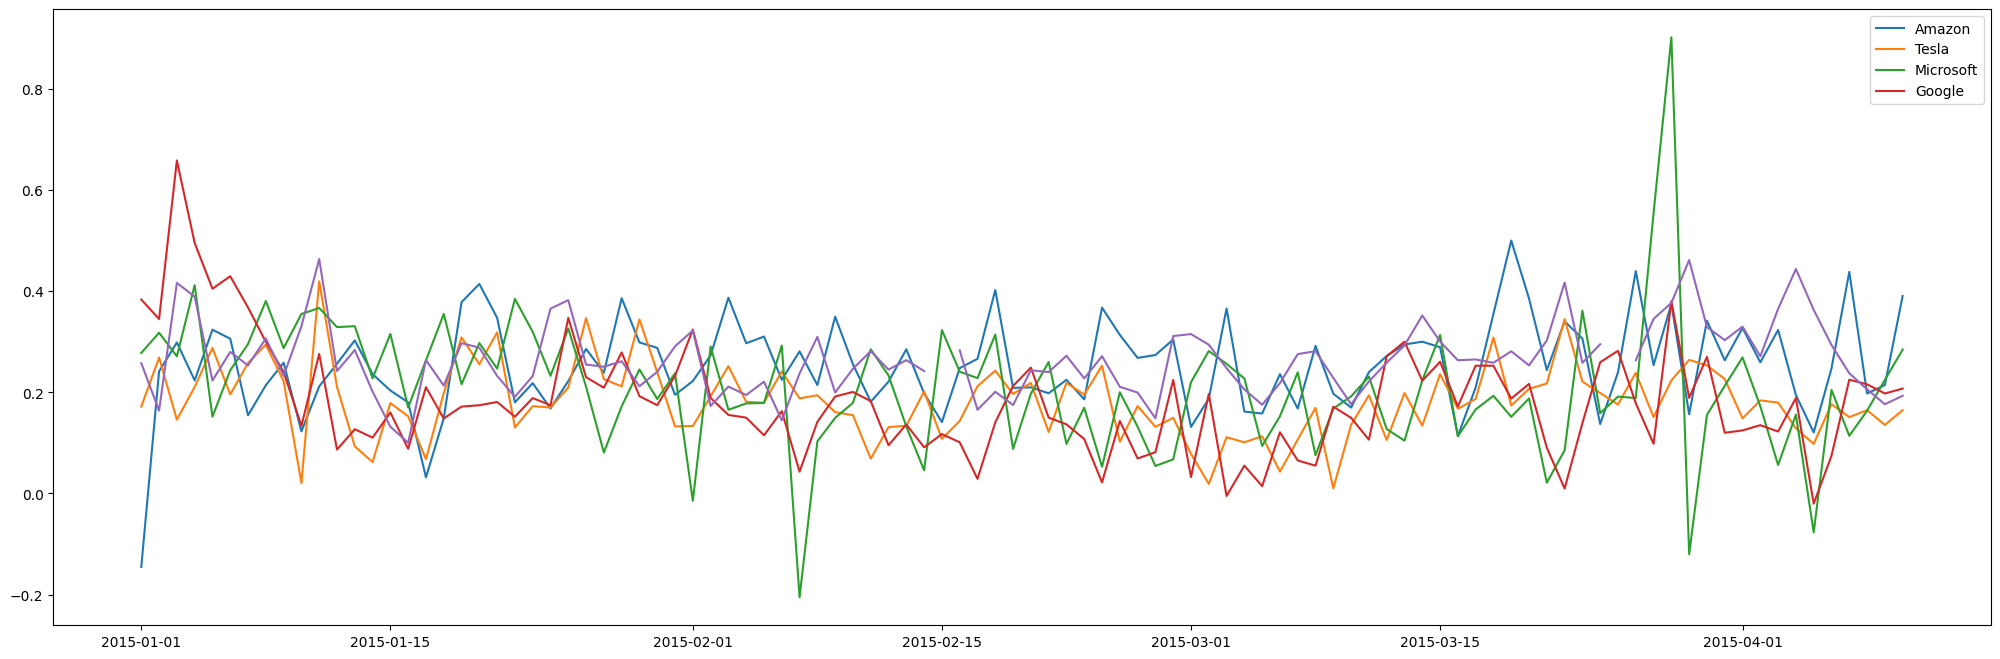

In [116]:
df_dup = df_dup.loc[0:100]
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(8)
# plt.plot(small_df['date'], small_df['AAPL'])
y = (df_dup['AAPL'])
x = (df_dup["date"])
plt.plot(df_dup['date'], df_dup['AMZN'])
plt.plot(df_dup['date'], df_dup['TSLA'])
plt.plot(df_dup['date'], df_dup['MSFT'])
plt.plot(df_dup['date'], df_dup['GOOG'])
plt.plot(x, y)
plt.legend(['Amazon', 'Tesla', 'Microsoft', 'Google'])

In [98]:
df.loc[502]

date     [2016-05-16]
AAPL         0.217464
AMZN         0.309091
TSLA         0.277778
MSFT         0.195652
GOOG         0.194274
GOOGL        0.191489
Name: 502, dtype: object

In [246]:
df.tail()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
1822,2019-12-27,0.288714,0.407563,0.196169,0.311005,0.284211,0.371069
1823,2019-12-28,0.271429,0.411765,0.286400,0.329268,0.333333,0.420000
1824,2019-12-29,0.310526,0.447368,0.184834,0.367647,0.340426,0.486486
1825,2019-12-30,0.307377,0.424474,0.142555,0.351020,0.534161,0.320312
1826,2019-12-31,0.279649,0.386076,0.207190,0.357798,0.280702,0.208333


In [120]:
stock.isnull().values.any()
stock.isnull().sum().sum()

0

In [156]:
result.head()

,tweet_id,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,reaction,date
0,550441509175443456,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,0,2015-01-01
1,550441672312512512,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,-1,2015-01-01
2,550441732014223360,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,-1,2015-01-01
3,550442977802207232,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,0,2015-01-01
4,550443807834402816,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,0,2015-01-01


In [146]:
result.dtypes

tweet_id          int64
post_date         int64
body             object
comment_num       int64
retweet_num       int64
like_num          int64
ticker_symbol    object
reaction          int64
date             object
dtype: object

In [147]:
stock.dtypes

ticker_symbol     object
day_date          object
close_value      float64
volume             int64
open_value       float64
high_value       float64
low_value        float64
dtype: object

In [124]:
print(stock.shape)

(17528, 7)


In [181]:
stock.to_csv('stocks.csv', index=False)

In [182]:
new_stocks = pd.read_csv('/Users/karlgilmartin/Documents/Data Analytics/Twitter /stocks.csv')

In [183]:
new_stocks.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AMZN,2010-06-01,123.2400,3650661,124.9700,126.5720,123.0200
1,AAPL,2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943
2,GOOGL,2010-06-01,243.6667,2664303,242.6868,248.0565,242.5302
3,MSFT,2010-06-01,25.8900,76120800,25.5300,26.3100,25.5200
4,GOOGL,2010-06-02,249.2233,2513109,245.8439,249.4759,243.2071


In [157]:
stock.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.47
1,AAPL,2020-05-28,318.25,33449100,316.77,323.44,315.63
2,AAPL,2020-05-27,318.11,28236270,316.14,318.71,313.09
3,AAPL,2020-05-26,316.73,31380450,323.50,324.24,316.50
4,AAPL,2020-05-22,318.89,20450750,315.77,319.23,315.35


In [180]:
stock = stock.sort_values(by =['day_date'])

In [169]:
stock.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
5601,AMZN,2010-06-01,123.2400,3650661,124.9700,126.5720,123.0200
2516,AAPL,2010-06-01,37.2614,218455576,37.0986,37.9914,36.9943
8686,GOOGL,2010-06-01,243.6667,2664303,242.6868,248.0565,242.5302
13894,MSFT,2010-06-01,25.8900,76120800,25.5300,26.3100,25.5200
8685,GOOGL,2010-06-02,249.2233,2513109,245.8439,249.4759,243.2071


In [242]:
new_stocks.tail()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
17523,GOOG,2020-05-29,1428.92,1838059,1416.94,1432.57,1413.3500
17524,AMZN,2020-05-29,2442.37,3529329,2415.94,2442.37,2398.1973
17525,GOOGL,2020-05-29,1433.52,1852522,1420.43,1436.73,1415.9800
17526,TSLA,2020-05-29,835.00,11812490,808.75,835.00,804.2100
17527,AAPL,2020-05-29,317.94,38399530,319.25,321.15,316.4700


In [227]:
stocks3 = new_stocks.loc[5954:6154]
stocks3.to_csv('stocks_refined.csv', index=False)
stocks4 = pd.read_csv('/Users/karlgilmartin/Documents/Data Analytics/Twitter /stocks_refined.csv')

In [250]:
new_stocks.shape

(17528, 7)

In [264]:
stocks5 = new_stocks.loc[5954:]

In [265]:
stocks5.loc[stocks5['day_date'] == "2019-12-31"]

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
16904,AAPL,2019-12-31,293.65,25247630,289.93,293.68,289.520
16905,AMZN,2019-12-31,1847.84,2510380,1842.00,1853.26,1832.230
16906,GOOGL,2019-12-31,1339.39,976061,1335.79,1340.66,1332.130
16907,GOOG,2019-12-31,1337.02,962468,1330.11,1338.00,1329.085
16908,MSFT,2019-12-31,157.70,18393380,156.77,157.77,156.450
16909,TSLA,2019-12-31,418.33,10292460,405.00,421.29,402.080


In [269]:
stocks5 = new_stocks.loc[5954:16909]

In [270]:
stocks5.tail()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
16905,AMZN,2019-12-31,1847.84,2510380,1842.00,1853.26,1832.230
16906,GOOGL,2019-12-31,1339.39,976061,1335.79,1340.66,1332.130
16907,GOOG,2019-12-31,1337.02,962468,1330.11,1338.00,1329.085
16908,MSFT,2019-12-31,157.70,18393380,156.77,157.77,156.450
16909,TSLA,2019-12-31,418.33,10292460,405.00,421.29,402.080


In [263]:
stocks5.tail()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
16906,GOOGL,2019-12-31,1339.39,976061,1335.79,1340.66,1332.130
16907,GOOG,2019-12-31,1337.02,962468,1330.11,1338.00,1329.085
16908,MSFT,2019-12-31,157.70,18393380,156.77,157.77,156.450
16909,TSLA,2019-12-31,418.33,10292460,405.00,421.29,402.080
16910,GOOG,2020-01-02,1367.37,1406731,1341.55,1368.14,1341.550


In [236]:
stocks4 = pd.read_csv('/Users/karlgilmartin/Documents/Data Analytics/Twitter /stocks_refined.csv')

In [256]:
df.tail()

,date,AAPL,AMZN,TSLA,MSFT,GOOG,GOOGL
1822,2019-12-27,0.288714,0.407563,0.196169,0.311005,0.284211,0.371069
1823,2019-12-28,0.271429,0.411765,0.286400,0.329268,0.333333,0.420000
1824,2019-12-29,0.310526,0.447368,0.184834,0.367647,0.340426,0.486486
1825,2019-12-30,0.307377,0.424474,0.142555,0.351020,0.534161,0.320312
1826,2019-12-31,0.279649,0.386076,0.207190,0.357798,0.280702,0.208333


In [259]:
stocks5.loc[stocks5['day_date'] == "2019-12-31"]

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
16904,AAPL,2019-12-31,293.65,25247630,289.93,293.68,289.520
16905,AMZN,2019-12-31,1847.84,2510380,1842.00,1853.26,1832.230
16906,GOOGL,2019-12-31,1339.39,976061,1335.79,1340.66,1332.130
16907,GOOG,2019-12-31,1337.02,962468,1330.11,1338.00,1329.085
16908,MSFT,2019-12-31,157.70,18393380,156.77,157.77,156.450
16909,TSLA,2019-12-31,418.33,10292460,405.00,421.29,402.080


In [226]:
stocks3.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
5954,MSFT,2015-01-01,46.45,21551090,46.73,47.44,46.45
5955,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
5956,TSLA,2015-01-01,222.41,2392947,223.09,225.68,222.25
5957,GOOG,2015-01-01,526.40,1367110,531.25,532.60,525.80
5958,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.01


In [241]:
stocks4.tail()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
196,AAPL,2015-02-02,118.63,62542440,118.05,119.170,116.08
197,AMZN,2015-02-02,364.47,10222230,350.05,365.000,350.01
198,GOOGL,2015-02-03,533.30,2352437,529.94,537.450,526.81
199,AMZN,2015-02-03,363.55,6209015,360.29,367.817,360.21
200,AAPL,2015-02-03,118.65,51842080,118.50,119.090,117.61


In [128]:
print(type(stock['day_date']))

<class 'pandas.core.series.Series'>


In [231]:
days_stocks = stocks3['day_date']
print(days_stocks)

5954    2015-01-01
5955    2015-01-01
5956    2015-01-01
5957    2015-01-01
5958    2015-01-01
           ...    
6150    2015-02-02
6151    2015-02-02
6152    2015-02-03
6153    2015-02-03
6154    2015-02-03
Name: day_date, Length: 201, dtype: object


In [221]:
stocks3.shape

(203, 7)

In [286]:
stocks3.tail()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
6150,AAPL,2015-02-02,118.63,62542440,118.05,119.170,116.08
6151,AMZN,2015-02-02,364.47,10222230,350.05,365.000,350.01
6152,GOOGL,2015-02-03,533.30,2352437,529.94,537.450,526.81
6153,AMZN,2015-02-03,363.55,6209015,360.29,367.817,360.21
6154,AAPL,2015-02-03,118.65,51842080,118.50,119.090,117.61


In [223]:
counter = 0
for day in days_stocks:
    if day not in nums:
        # index = df[(stock.day_date == day)].index
        # stock.drop(index)
        counter += 1

In [224]:
print(counter)

203


In [153]:
stock['day_date'] =  pd.to_datetime(stock['day_date'],format='%Y%m%d')

In [228]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17528 entries, 5601 to 0
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  17528 non-null  object 
 1   day_date       17528 non-null  object 
 2   close_value    17528 non-null  float64
 3   volume         17528 non-null  int64  
 4   open_value     17528 non-null  float64
 5   high_value     17528 non-null  float64
 6   low_value      17528 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 1.6+ MB


In [140]:
stock1.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value


Text(0.5, 0, 'Google Stock Market')

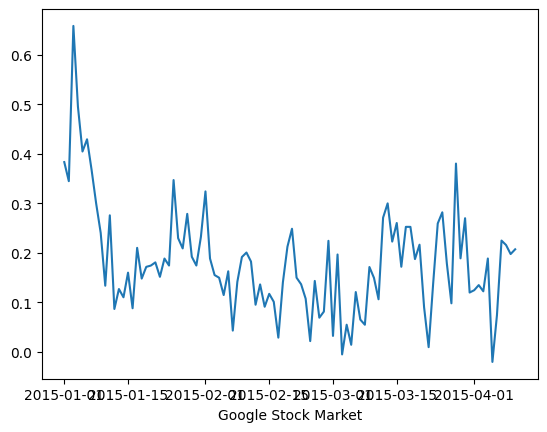

In [239]:
GOOG_STOCK = (stocks4.loc[(stocks4['ticker_symbol'] == 'GOOG' )& (stocks4['day_date'] == date), 'high_value'].sum())
plt.plot(df_dup['date'], df_dup['GOOG'])
plt.xlabel("Google Stock Market")

In [277]:
stocks5.describe()

,close_value,volume,open_value,high_value,low_value
count,10956.000000,1.095600e+04,10956.000000,10956.000000,10956.000000
mean,576.189461,1.340666e+07,576.501376,581.626626,570.685208
std,489.069181,1.717576e+07,489.598039,493.419289,484.836140
min,40.290000,3.475180e+05,40.340000,40.740000,39.720000
25%,152.240000,1.971317e+06,152.880000,153.977500,150.560000
50%,370.560000,4.570378e+06,370.310000,374.455000,366.080000
75%,947.680000,2.221280e+07,948.005000,953.857425,940.606250
max,2039.510000,1.691150e+08,2038.110000,2050.500000,2013.000000


In [278]:
stocks5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 5954 to 16909
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  10956 non-null  object 
 1   day_date       10956 non-null  object 
 2   close_value    10956 non-null  float64
 3   volume         10956 non-null  int64  
 4   open_value     10956 non-null  float64
 5   high_value     10956 non-null  float64
 6   low_value      10956 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 599.3+ KB


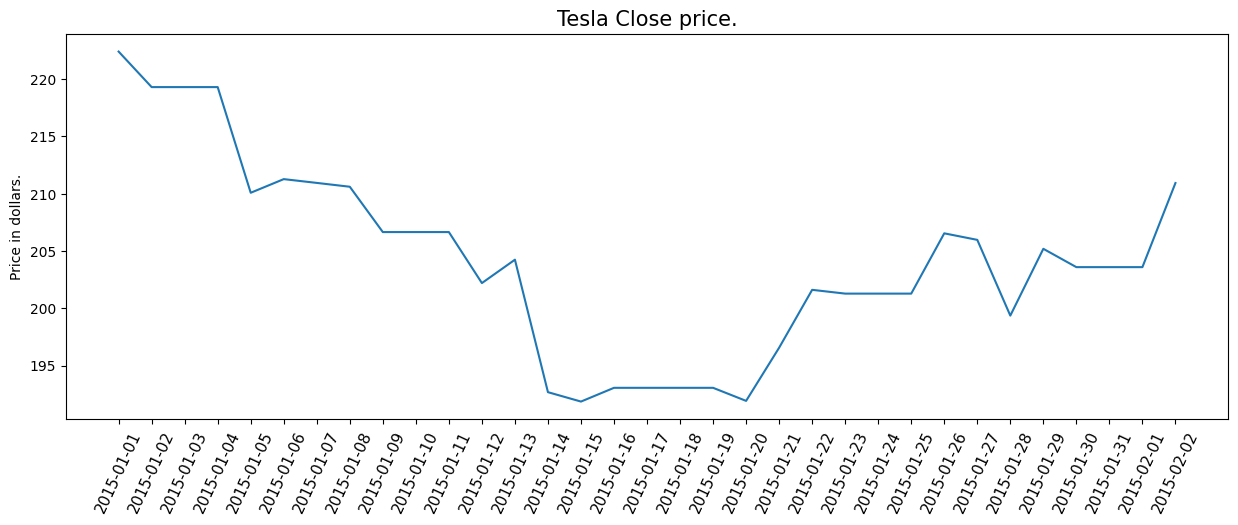

In [287]:
plt.figure(figsize=(15,5))
plt.plot(stocks3.loc[(stocks5['ticker_symbol'] == 'TSLA' ), 'day_date'],stocks3.loc[(stocks5['ticker_symbol'] == 'TSLA' ), 'close_value'])
plt.title('Tesla Close price.', fontsize=15)
plt.ylabel('Price in dollars.')
plt.xticks(rotation = 65, fontsize = 11)
plt.show()

In [290]:
stocks5.isnull().sum()

ticker_symbol    0
day_date         0
close_value      0
volume           0
open_value       0
high_value       0
low_value        0
dtype: int64

/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove

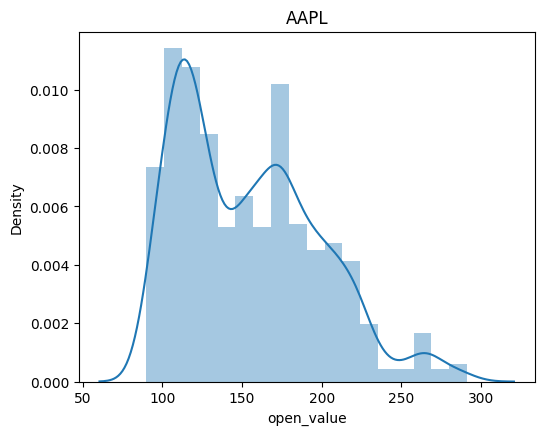

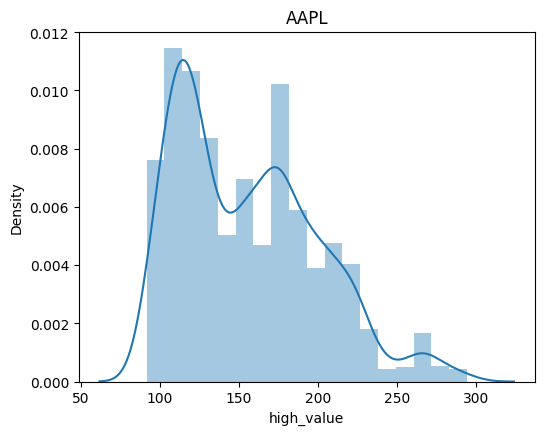

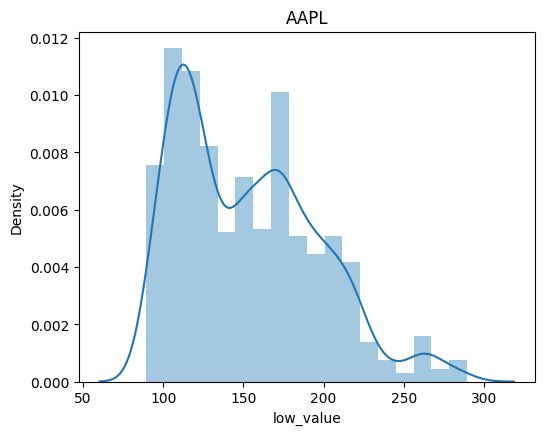

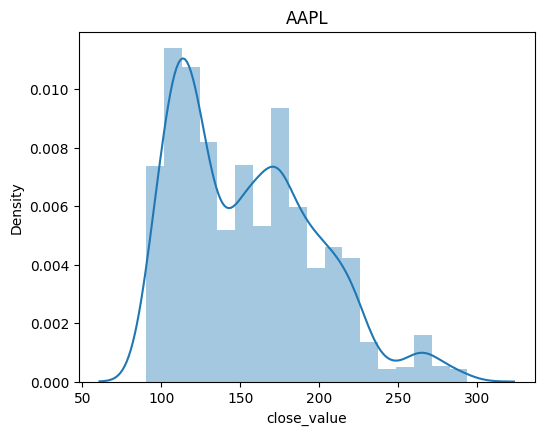

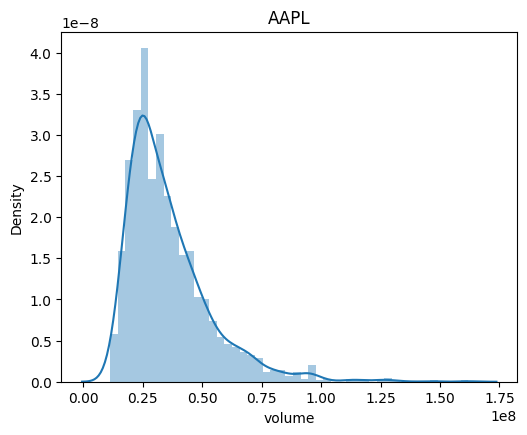

/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove

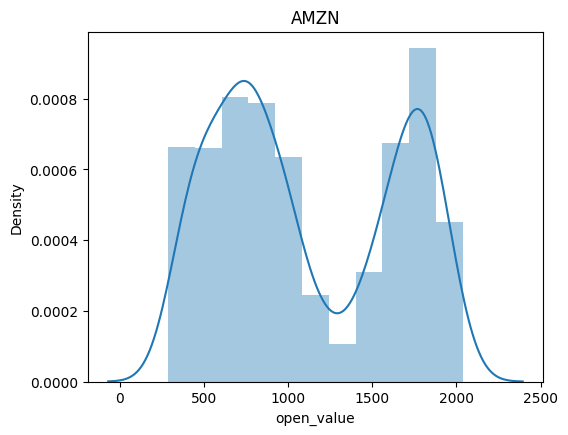

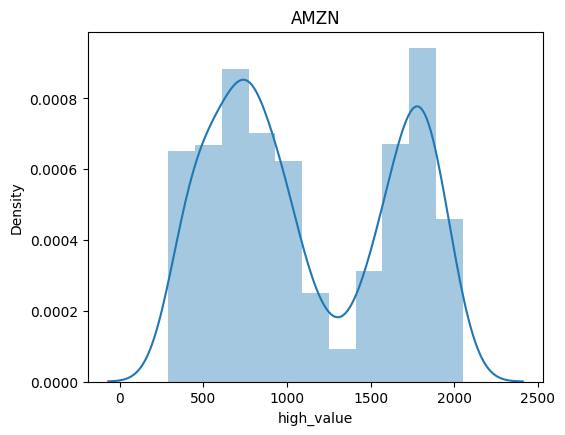

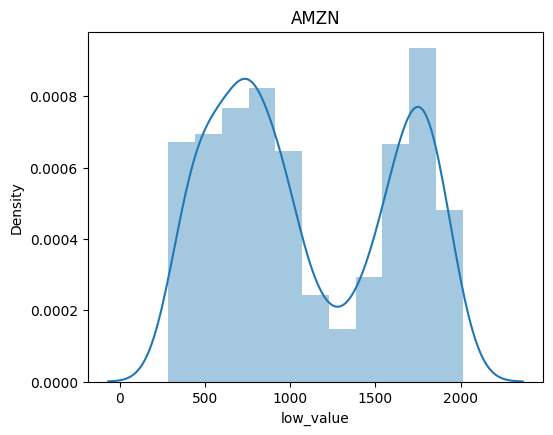

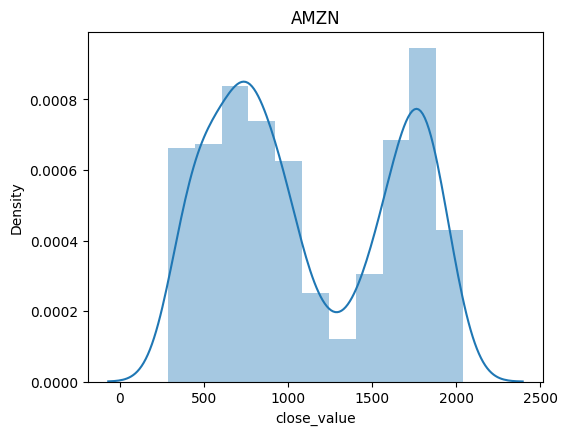

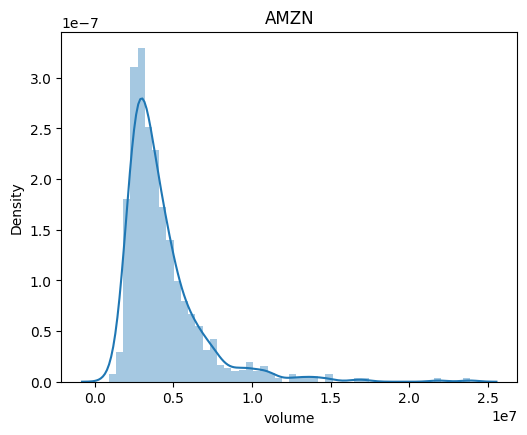

/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove

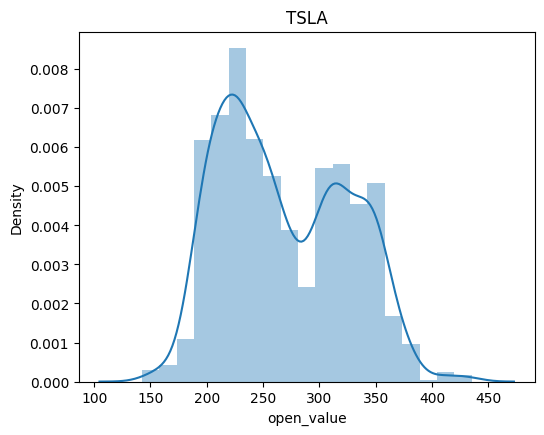

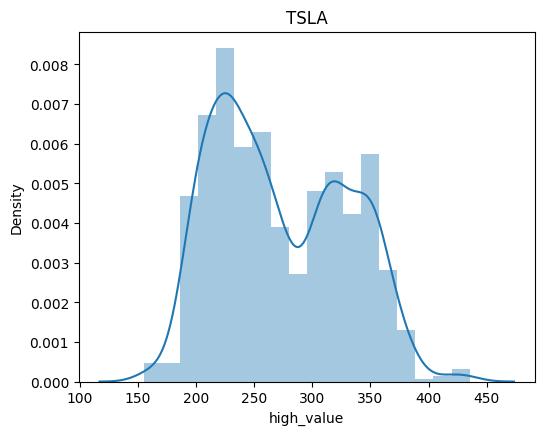

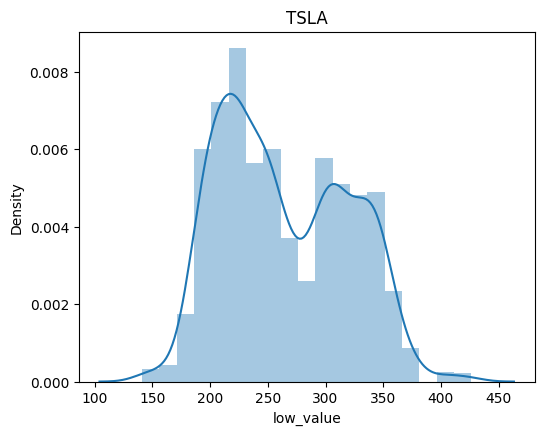

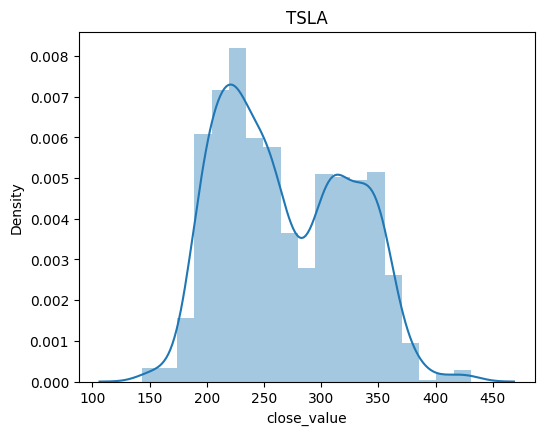

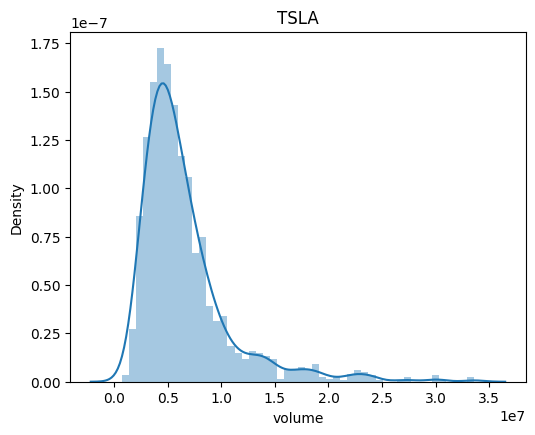

/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove

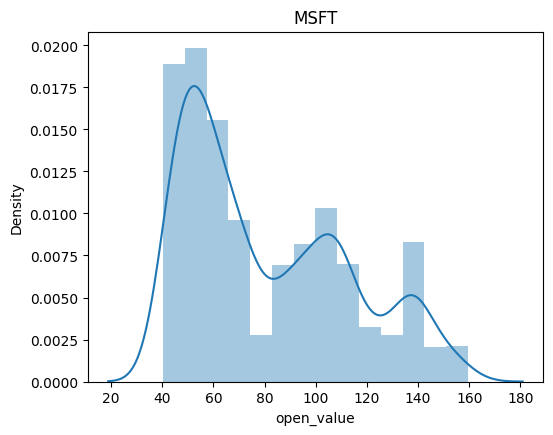

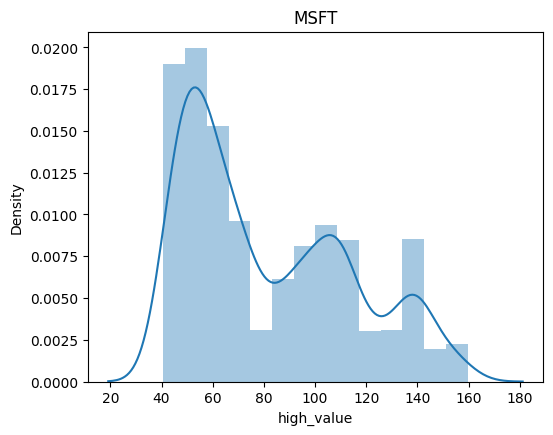

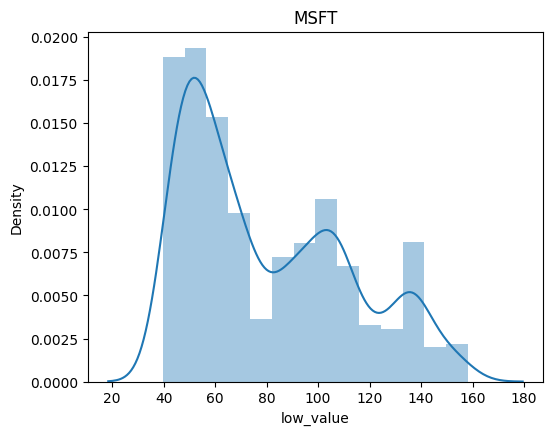

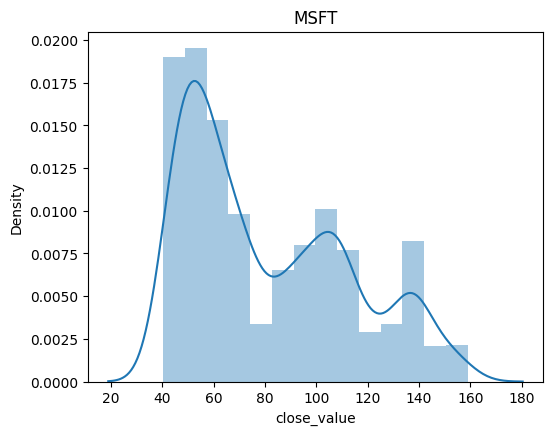

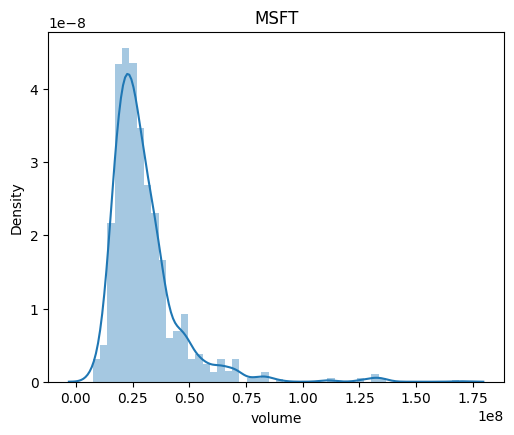

/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove

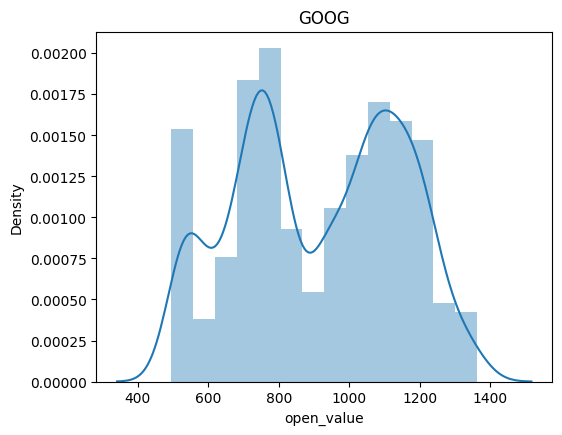

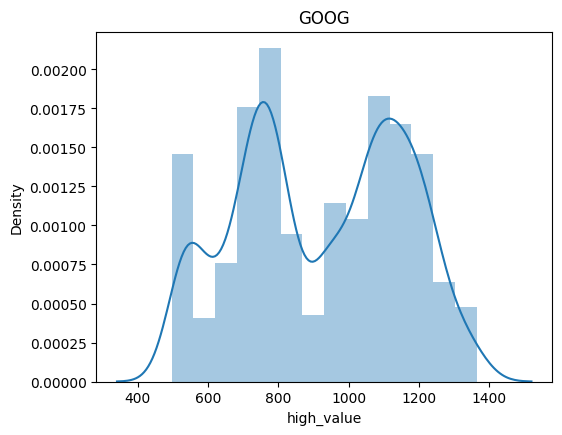

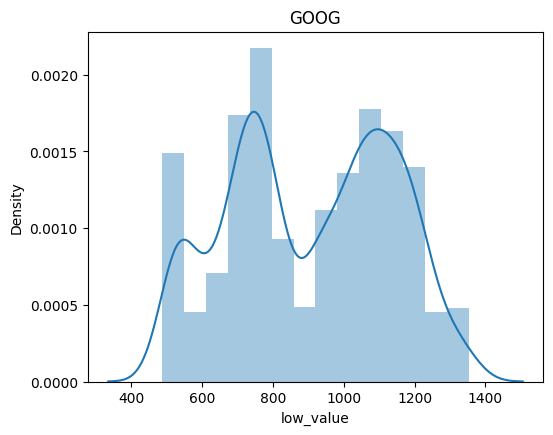

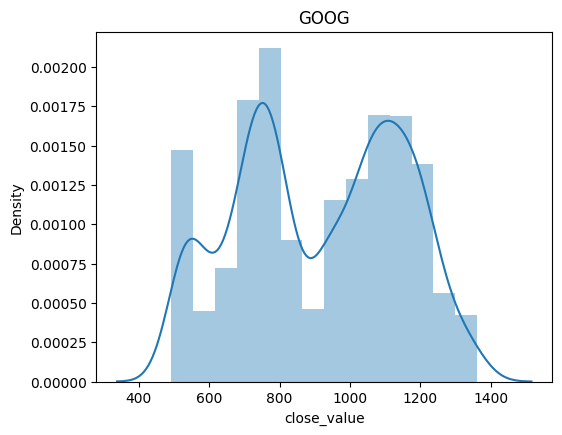

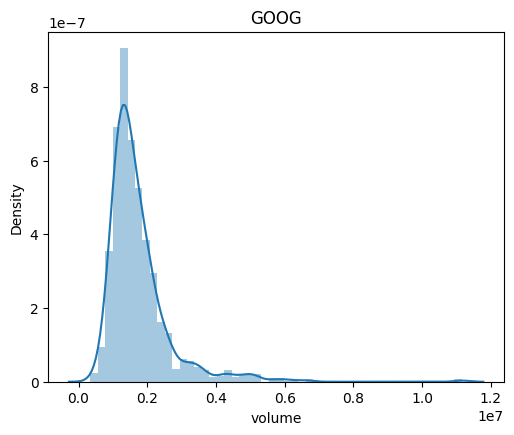

/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data)
/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2379462168.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove

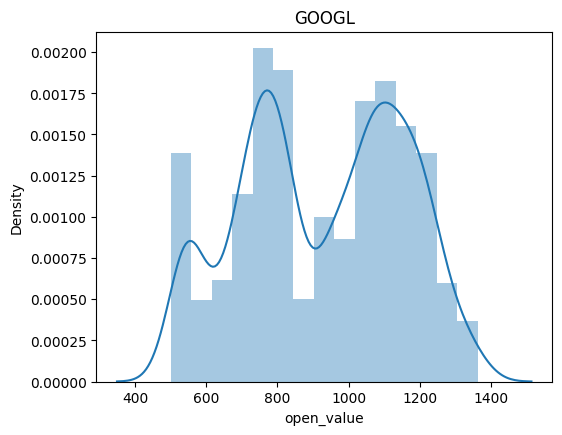

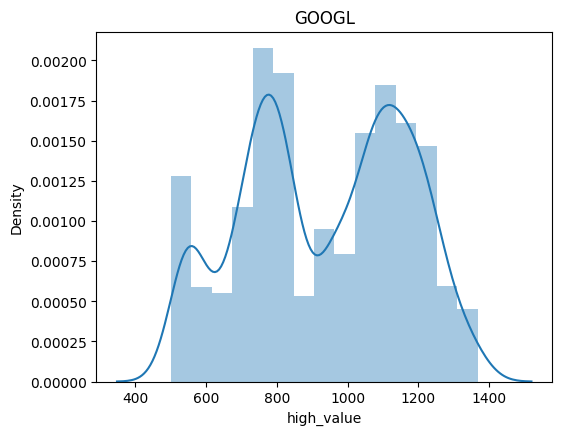

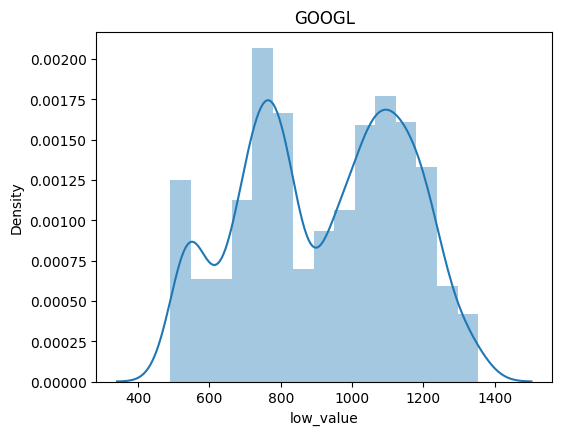

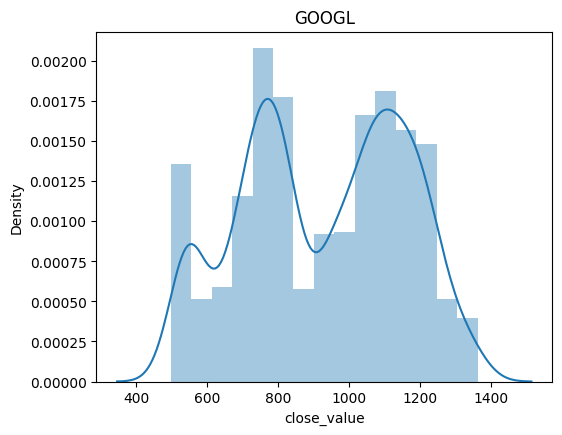

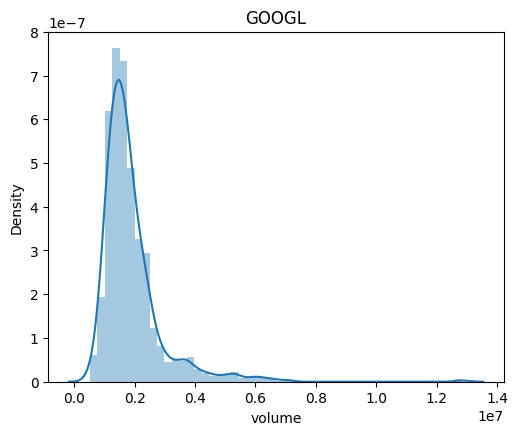

In [299]:
features = ['open_value', 'high_value', 'low_value', 'close_value', 'volume']

for company in companies:
    for i, col in enumerate(features):
        data = stocks5.loc[(stocks5['ticker_symbol'] == company ), col]
        plt.subplots(figsize=(20,10))
        plt.subplot(2,3,i+1)
        plt.title(company)
        sns.distplot(data)
    plt.show()


In [303]:
stocks5.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
5954,MSFT,2015-01-01,46.45,21551090,46.73,47.44,46.45
5955,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
5956,TSLA,2015-01-01,222.41,2392947,223.09,225.68,222.25
5957,GOOG,2015-01-01,526.40,1367110,531.25,532.60,525.80
5958,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.01


In [312]:
stocks5 = stocks5.reset_index(drop=True)

In [315]:
stocks5['day_date'] = pd.to_datetime(stocks5['day_date']).dt.date

In [319]:
stocks5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10956 entries, 0 to 10955
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ticker_symbol  10956 non-null  object 
 1   day_date       10956 non-null  object 
 2   close_value    10956 non-null  float64
 3   volume         10956 non-null  int64  
 4   open_value     10956 non-null  float64
 5   high_value     10956 non-null  float64
 6   low_value      10956 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 599.3+ KB


In [316]:
stocks5.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value
0,MSFT,2015-01-01,46.45,21551090,46.73,47.44,46.45
1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21
2,TSLA,2015-01-01,222.41,2392947,223.09,225.68,222.25
3,GOOG,2015-01-01,526.40,1367110,531.25,532.60,525.80
4,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.01


/var/folders/9g/zj3ly2xd1y328061r4214_mm0000gn/T/ipykernel_2709/2028980075.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,3,i+1)


KeyError: 0

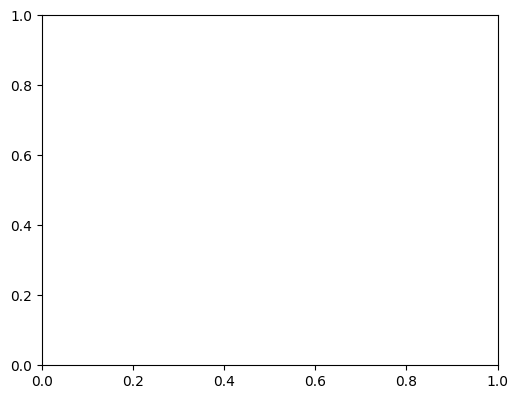

In [318]:
features = ['open_value', 'high_value', 'low_value', 'close_value', 'volume']
for company in companies:
    for i, col in enumerate(features):
        plt.subplots(figsize=(20,10))
        data = stocks5.loc[(stocks5['ticker_symbol'] == company ), col]
        plt.subplot(2,3,i+1)
        # print(data)
        sns.boxplot(data)
    plt.show()


# plt.subplots(figsize=(20,10))
 
# for i, col in enumerate(features):
#   plt.subplot(2,3,i+1)
#   sns.boxplot(stocks5.loc[(stocks5['ticker_symbol'] == company ), col])
# plt.show()



In [320]:
splitted = stocks5['day_date'].str.split('-', expand=True)
 
stocks5['day'] = splitted[1].astype('int')
stocks5['month'] = splitted[0].astype('int')
stocks5['year'] = splitted[2].astype('int')
 
stocks5.head()

AttributeError: Can only use .str accessor with string values!

In [335]:

from datetime import datetime
for day in stocks5['day_date']:
    stocks5['year'] = day.strftime("%Y")
    stocks5['month'] = day.strftime("%m")
    data = day.strftime("%d")
    print(data) 
    stocks5['day'] = data
    

01
01
01
01
01
01
02
02
02
02
02
02
03
03
03
03
03
03
04
04
04
04
04
04
05
05
05
05
05
05
06
06
06
06
06
06
07
07
07
07
07
07
08
08
08
08
08
08
09
09
09
09
09
09
10
10
10
10
10
10
11
11
11
11
11
11
12
12
12
12
12
12
13
13
13
13
13
13
14
14
14
14
14
14
15
15
15
15
15
15
16
16
16
16
16
16
17
17
17
17
17
17
18
18
18
18
18
18
19
19
19
19
19
19
20
20
20
20
20
20
21
21
21
21
21
21
22
22
22
22
22
22
23
23
23
23
23
23
24
24
24
24
24
24
25
25
25
25
25
25
26
26
26
26
26
26
27
27
27
27
27
27
28
28
28
28
28
28
29
29
29
29
29
29
30
30
30
30
30
30
31
31
31
31
31
31
01
01
01
01
01
01
02
02
02
02
02
02
03
03
03
03
03
03
04
04
04
04
04
04
05
05
05
05
05
05
06
06
06
06
06
06
07
07
07
07
07
07
08
08
08
08
08
08
09
09
09
09
09
09
10
10
10
10
10
10
11
11
11
11
11
11
12
12
12
12
12
12
13
13
13
13
13
13
14
14
14
14
14
14
15
15
15
15
15
15
16
16
16
16
16
16
17
17
17
17
17
17
18
18
18
18
18
18
19
19
19
19
19
19
20
20
20
20
20
20
21
21
21
21
21
21
22
22
22
22
22
22
23
23
23
23
23
23
24
24
24
24
24
24
25
25
25
2

In [337]:
stocks5.head()

,ticker_symbol,day_date,close_value,volume,open_value,high_value,low_value,day,year,month
0,MSFT,2015-01-01,46.45,21551090,46.73,47.44,46.45,31,2019,12
1,AAPL,2015-01-01,110.38,41304780,112.82,113.13,110.21,31,2019,12
2,TSLA,2015-01-01,222.41,2392947,223.09,225.68,222.25,31,2019,12
3,GOOG,2015-01-01,526.40,1367110,531.25,532.60,525.80,31,2019,12
4,AMZN,2015-01-01,310.35,2048676,311.55,312.98,310.01,31,2019,12


In [ ]:
def column_distplot(df, column_name, bins=50, describe=True):
    if describe:
        print(df[column_name].describe())
    plt.figure(figsize=(9, 8))
    sns.distplot(df[column_name], color='g', bins=bins, hist_kws={'alpha': 0.4});

column_distplot(company_value, "volume")

In [338]:
print('helo')

helo
